## Author : Eoghan O'Connor

In [368]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("./bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [369]:
df_original = df.copy()

## B. Process and Encode the Categorical Features

In [370]:
scale_mapper = {
    "primary": 0,
    "secondary": 1,
    "tertiary": 2
}

df['education'] = df['education'].replace(scale_mapper)

df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,1.0,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,0.0,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,0.0,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,1.0,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


<b>Above</b>: Education has 3 levels which ordinal. Therefore they are replaced with values 0-2.

In [371]:
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

In [372]:
df = pd.get_dummies(df, columns=['marital','default','housing','loan','poutcome'], 
                        dummy_na=False, 
                        drop_first=True)
df.tail()

,age,job,education,balance,contact,day,month,duration,campaign,pdays,previous,subscribed,marital_married,marital_single,default_yes,housing_yes,loan_yes,poutcome_other,poutcome_success
1995,20.0,student,NaN,2785,cellular,16,sep,327,2,-1,0,yes,0,1,0,0,0,0,0
1996,28.0,admin.,1.0,127,cellular,16,sep,1334,2,-1,0,yes,0,1,0,0,0,0,0
1997,81.0,retired,0.0,1154,telephone,17,sep,231,1,-1,0,yes,1,0,0,0,0,0,0
1998,46.0,services,0.0,4343,NaN,20,sep,185,1,-1,0,yes,1,0,0,1,0,0,0
1999,40.0,entrepreneur,1.0,6403,cellular,22,sep,208,2,-1,0,yes,1,0,0,0,0,0,0


In [373]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,education,balance,day,duration,campaign,pdays,previous,marital_married,marital_single,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,subscribed_yes
0,32.0,2.0,392,1,957,2,131,2,0,1,...,0,0,0,0,0,0,0,0,0,0
1,39.0,1.0,688,1,233,2,133,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,59.0,1.0,1035,1,126,2,239,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,47.0,1.0,398,1,274,1,238,2,1,0,...,0,0,0,0,0,0,0,0,0,0
4,54.0,1.0,1004,1,479,1,307,1,1,0,...,0,0,0,0,0,0,0,0,0,0


<b>Above</b>: One hot encoding the categorical categorical columns with NaNs. <br>
Then one hot encoding all other categorical columns.

### Impute Missing Values

In [374]:
df.isna().sum()

age                   12
education            104
balance                0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
marital_married        0
marital_single         0
default_yes            0
housing_yes            0
loan_yes               0
poutcome_other         0
poutcome_success       0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
contact_telephone      0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
subscribed_yes         0
dtype: int64

In [375]:
df.corr()['age'].nlargest(3)

age                1.000000
job_retired        0.590310
marital_married    0.360775
Name: age, dtype: float64

In [376]:
 ptable = df.pivot_table(values='age',
                       index='marital_married',
                       columns='job_retired',
                       aggfunc=np.median)
ptable
def get_element(x):
    return ptable.loc[x['marital_married'], x['job_retired']]
# Replace missing values
df['age'].fillna(df[df['age'].isnull()].apply(get_element, axis=1), inplace=True)

In [377]:
df.corr()['education'].nlargest(3)

education         1.000000
job_management    0.532765
marital_single    0.193190
Name: education, dtype: float64

In [378]:
# Define function to return an element of the pivot table
ptable = df.pivot_table(values='education', 
                        index='job_management',
                        columns='marital_single',  
                        aggfunc=np.median)
ptable
def get_element(x):
    return ptable.loc[x['job_management'], x['marital_single']]

# Replace missing values
df['education'].fillna(df[df['education'].isnull()].apply(get_element, axis=1), inplace=True)

<b>Above</b>: Filling in the missing values for age and education. This is done by using a ptable and highest correlations providing most accurate values. For age, marital_married and job_retired have the highest correlation. For education, job_management and martial_single has the highest correlation.

## C. Rescaling

Quickly checking what the distributions are like

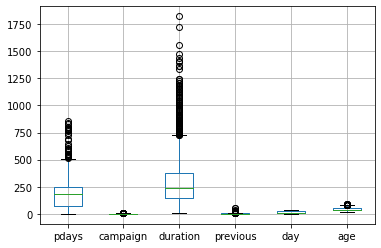

<AxesSubplot:>

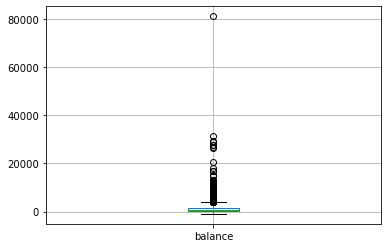

In [379]:
df.boxplot(column=[ 'pdays','campaign','duration','previous','day','age'])
plt.show()
df.boxplot(column=['balance'])

In [380]:
robust_scaler = RobustScaler()
df[['pdays','duration','balance']] = robust_scaler.fit_transform(df[['pdays','duration','balance']])

<b>Above</b>: Using RobustScaler to adjust pdays, duration,balance. RobustScaler does a good job of rescaling these columns as shown in the box plots they have significant outliers. The outcome is shown below.

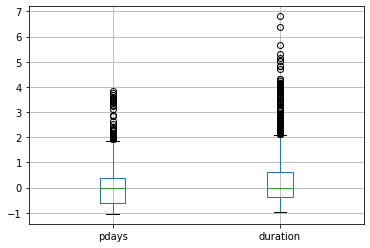

<AxesSubplot:>

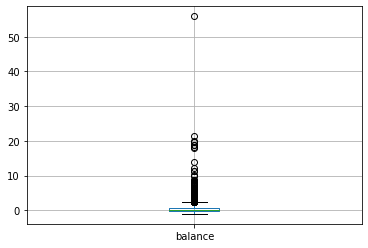

In [381]:
df.boxplot(column=[ 'pdays','duration'])
plt.show()
df.boxplot(column=[ 'balance'])

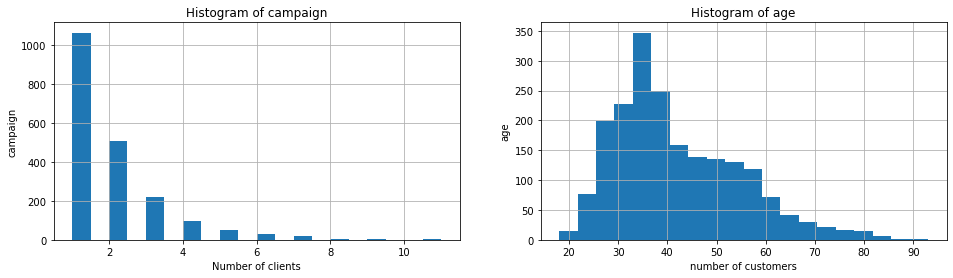

In [382]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot ApplicantIncome
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of campaign")
ax1.set_xlabel('Number of clients')
ax1.set_ylabel('campaign')
df['campaign'].hist(bins=20)
# Plot ApplicantIncome

# Plot LoanAmount
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of age")
ax3.set_xlabel('number of customers')
ax3.set_ylabel('age')
df['age'].hist(bins=20)

plt.show()

In [383]:
MinMaxScaler_scaler = MinMaxScaler()
df[['campaign']] = MinMaxScaler_scaler.fit_transform(df[['campaign']])
df[['age']] = MinMaxScaler_scaler.fit_transform(df[['age']])

<b>Above</b>: campaign and age dont have any significant outlers as shown. Age provides a gaussian distribution. As for campaign there isn't anything significant that can be done to adjust the distribution to be more gaussian. MinMax scaling is used to adjust values to be between 0-1.

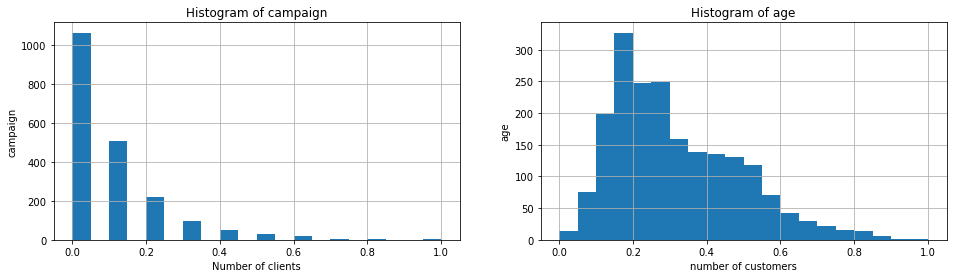

In [384]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot ApplicantIncome
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of campaign")
ax1.set_xlabel('Number of clients')
ax1.set_ylabel('campaign')
df['campaign'].hist(bins=20)
# Plot ApplicantIncome

# Plot LoanAmount
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of age")
ax3.set_xlabel('number of customers')
ax3.set_ylabel('age')
df['age'].hist(bins=20)

plt.show()

In [385]:
df['education'] = df['education']/2

Above: Education was given values from 0-2. Therefore by dividing by this will rescale the values appropiately.

In [386]:
df.head()

,age,education,balance,day,duration,campaign,pdays,previous,marital_married,marital_single,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,subscribed_yes
0,0.186667,1.0,-0.110187,1,3.094421,0.1,-0.291013,2,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.280000,0.5,0.094941,1,-0.012876,0.1,-0.279601,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.546667,0.5,0.335412,1,-0.472103,0.1,0.325250,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.386667,0.5,-0.106029,1,0.163090,0.0,0.319544,2,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.480000,0.5,0.313929,1,1.042918,0.0,0.713267,1,1,0,...,0,0,0,0,0,0,0,0,0,0


### Treatment of Outliers

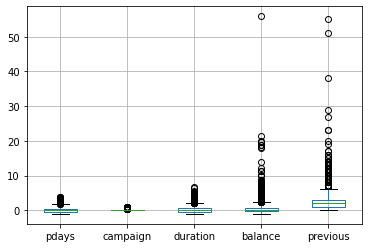

In [387]:
df.boxplot(column=[ 'pdays','campaign','duration','balance','previous'])
plt.show()

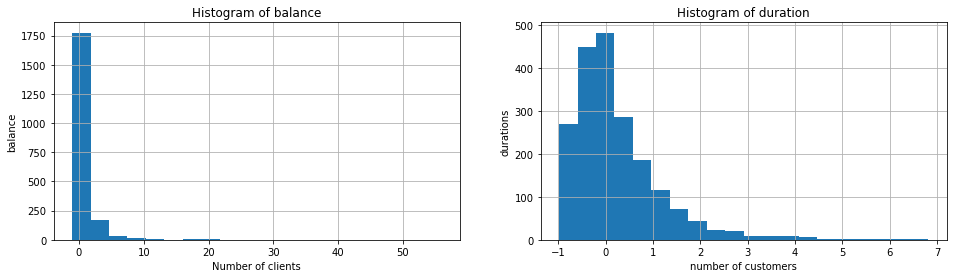

In [388]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot ApplicantIncome
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of balance")
ax1.set_xlabel('Number of clients')
ax1.set_ylabel('balance')
df['balance'].hist(bins=20)
# Plot ApplicantIncome

# Plot LoanAmount
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of duration")
ax3.set_xlabel('number of customers')
ax3.set_ylabel('durations')
df['duration'].hist(bins=20)

plt.show()

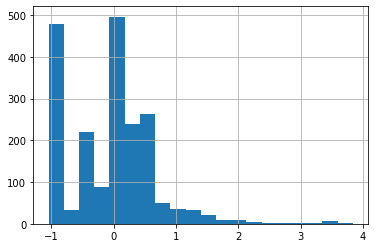

In [389]:
df['pdays'].hist(bins=20)
plt.show()

In [390]:
df[['balance', 'duration','pdays']].min()

balance    -1.060984
duration   -0.982833
pdays      -1.044223
dtype: float64

In [391]:
# Use a log transformation to decrease the impact of outliers
df['balance'] = np.log(df['balance']+2.061)
df['duration'] = np.log(df['duration']+1.99)
df['pdays'] = np.log(df['pdays']+2.04)

Above: balance, duration are skewed to the left. To adjust this and make the distribution more even and to deal with the outliers a log transformation is used. Pdays has a tail to the left, which can be improved using a log transform. Making the data more gaussian.

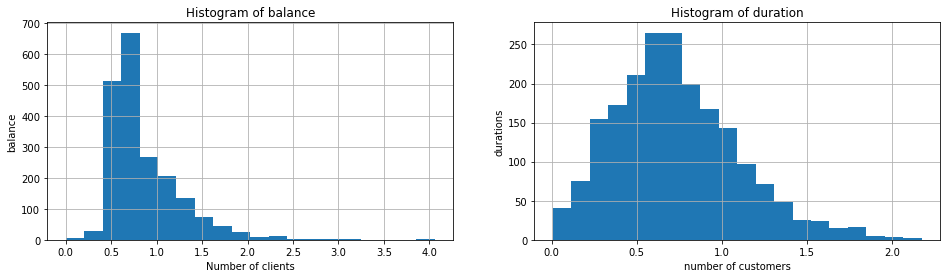

In [392]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot ApplicantIncome
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of balance")
ax1.set_xlabel('Number of clients')
ax1.set_ylabel('balance')
df['balance'].hist(bins=20)
# Plot ApplicantIncome

# Plot LoanAmount
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of duration")
ax3.set_xlabel('number of customers')
ax3.set_ylabel('durations')
df['duration'].hist(bins=20)

plt.show()

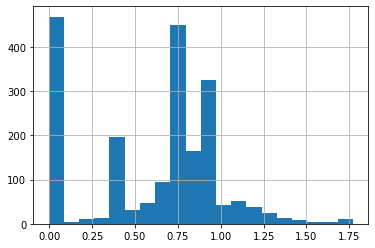

In [393]:
df['pdays'].hist(bins=20)
plt.show()

### Creation of Derived Features
housing: has housing loan? (categorical: 'no','yes','unknown')<br>
loan: has personal loan? (categorical: 'no','yes','unknown')

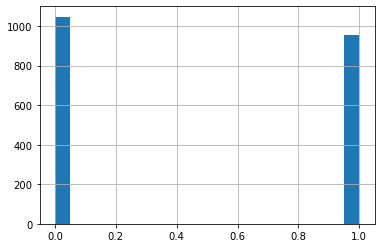

In [394]:
df['finacial_independent'] = np.where((df['balance']> 0) & ( df['housing_yes']==0) & ( df['loan_yes']==0) & ( df['default_yes']==0), 1, 0)
df['finacial_independent'].hist(bins=20)
plt.show()

In [395]:
df.corr()['subscribed_yes'].nlargest(3)

subscribed_yes          1.000000
finacial_independent    0.589652
poutcome_success        0.510117
Name: subscribed_yes, dtype: float64

<b>Above</b>: New feature finacial_independent is created. This shows if the client owes money or not. This can give significant insight into the borrowings of the client and the financial pressures they're having. This returns the highest correlation for subscription at approx. .58 as shown above.

In [396]:
df['new_contact'] = np.where(df_original['pdays']== -1, 1, 0)

In [397]:
df.corr()['subscribed_yes'].nlargest(15)

subscribed_yes          1.000000
finacial_independent    0.589652
poutcome_success        0.510117
duration                0.459258
month_jul               0.301840
month_aug               0.270114
month_sep               0.267976
balance                 0.239526
month_jun               0.234206
month_oct               0.206587
job_retired             0.201587
job_student             0.182442
day                     0.153196
new_contact             0.145622
marital_single          0.143859
Name: subscribed_yes, dtype: float64

<b>Above</b>: New contact, shows if the client has never been contacted before. This has a reasonable correlation of .146 to subscription. This class was hidden among the pdays and offers alot of insight to how new contacts perform. This class could be used for testing also as they haven't been contacted.

### Dropping irrelavant columns

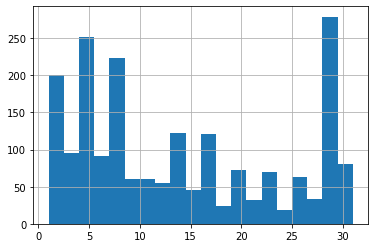

In [398]:
df['day'].hist(bins=20)
plt.show()

In [399]:
df.drop('day', axis=1, inplace=True)

<b>Above</b> The column day of the month is a cyclical category. It does really provide any signifcant details, Months provide the more significant information about time of year and is a better predictor. Therefore day is dropped as an irrelavant column.

In [400]:
df.describe()

,age,education,balance,duration,campaign,pdays,previous,marital_married,marital_single,default_yes,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,subscribed_yes,finacial_independent,new_contact
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.316653,0.622500,0.864361,0.730507,0.090950,0.597845,2.561500,0.555500,0.337000,0.007500,...,0.083500,0.052000,0.035000,0.166500,0.034000,0.046500,0.067000,0.500000,0.476500,0.227000
std,0.169396,0.317087,0.403066,0.363811,0.137886,0.394928,3.400735,0.497034,0.472803,0.086299,...,0.276706,0.222083,0.183826,0.372622,0.181274,0.210618,0.250085,0.500125,0.499572,0.418997
min,0.000000,0.000000,0.000016,0.007142,0.000000,-0.004231,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.186667,0.500000,0.598175,0.472335,0.000000,0.360273,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.266667,0.500000,0.723191,0.688135,0.000000,0.712950,2.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000
75%,0.426667,1.000000,1.036310,0.956947,0.100000,0.889422,3.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,4.059642,2.174883,1.000000,1.770625,55.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Save prepared dataset

In [401]:
df.to_csv('bank_train_prepared.csv')